# Импорт модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.svm import SVC
from sklearn import metrics
import warnings

# Отключение ошибок
warnings.filterwarnings('ignore')

# Первичный анализ 

## 1.  Загрузите данные о выживаемости пассажиров Титаника из файла titanic_train.csv

In [2]:
df = pd.read_csv('titanic_train.csv')

## 2. Представьте данные в виде таблицы. Посмотрите на первые 5 строк

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Выведите на экран основную информацию (info) о наборе данных и признаках. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Выведите описательные статистики (медиану, среднее, квартили, минимальное, максимальное значения, дисперсию) массива данных в виде таблицы (describe). 

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 6. Избавьтесь от пустых значений, заменив их на медианные значения (для количественных признаков) и на наиболее часто встречающееся (для категориальных). (используйте value_counts() для определения наиболее часто встречающегося)) 

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform([df['Age']])
imp_mean_df = pd.DataFrame({'Age': imp_mean[0]})
imp_mean_df

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
709,39.0
710,27.0
711,19.0
712,26.0


In [7]:
clean_age = df['Age'].fillna(value=df['Age'].mean())
clean_cabin = df['Cabin'].fillna(value=df['Cabin'].value_counts().keys()[0])
clean_embarked = df['Embarked'].fillna(value=df['Embarked'].value_counts().keys()[0])
clean_df = pd.DataFrame({
    'Age': clean_age,
    'Cabin': clean_cabin,
    'Embarked': clean_embarked
})
df['Age'] = clean_df['Age'].values
df['Cabin'] = clean_df['Cabin'].values
df['Embarked'] = clean_df['Embarked'].values

In [8]:
# Проверка очистки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 7. Выведите на экран сколько мужчин и сколько женщин находилось на борту? 

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## 8. Выведите распределение переменной Pclass по всем классам (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса? 

In [10]:
print('Мужчин 2-го класса:')
df[df['Sex'] == 'male'][df['Pclass'] == 2].count()[0]

Мужчин 2-го класса:


108

## 9. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков. 

In [11]:
print('Медиана ' + str(round(df['Fare'].mean(), 2)) )
print('Стандартное ' + str(round(df['Fare'].std(), 2)))

Медиана 32.2
Стандартное 49.69


# Визуализация 

## 10. Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn). 

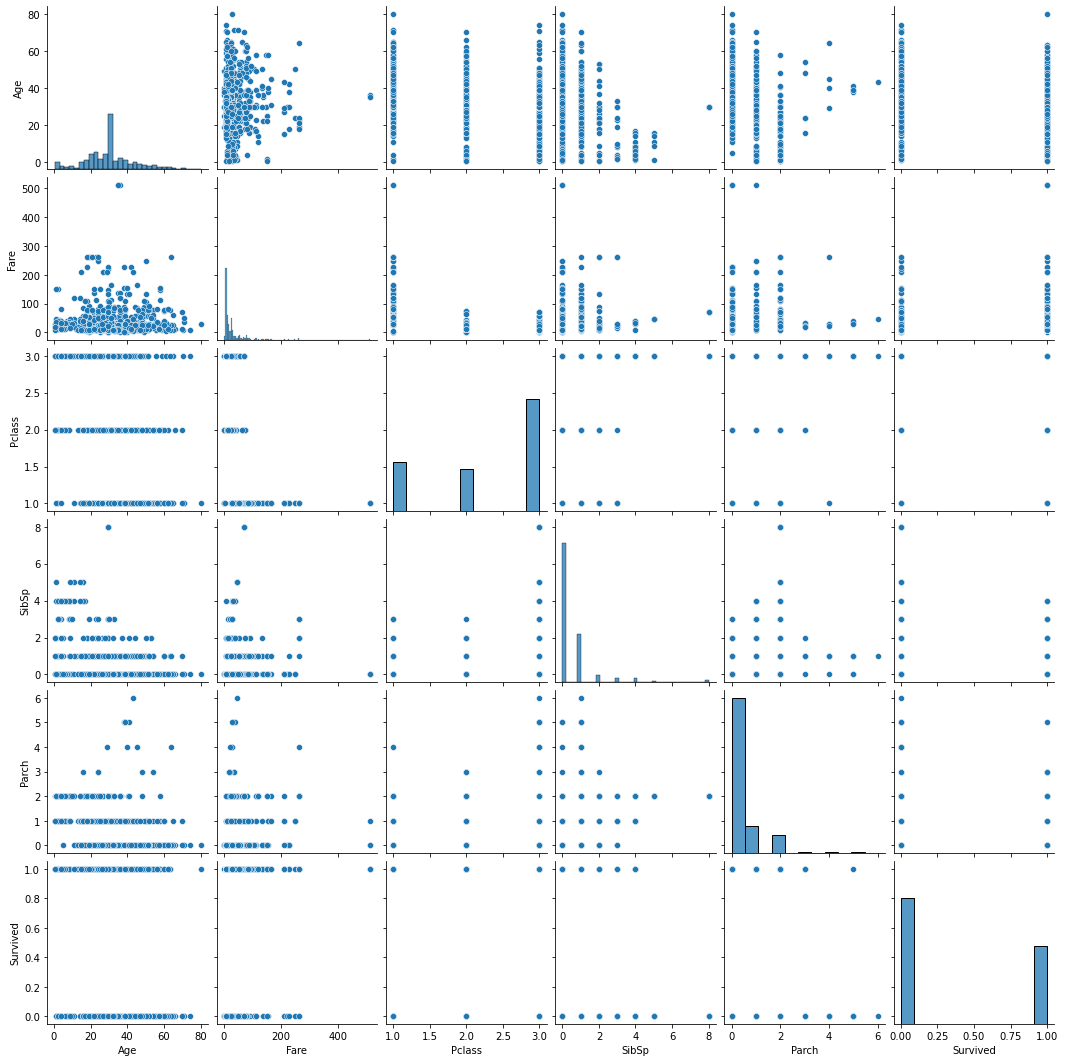

In [12]:
fields = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
sns.pairplot(df[fields])

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Age',

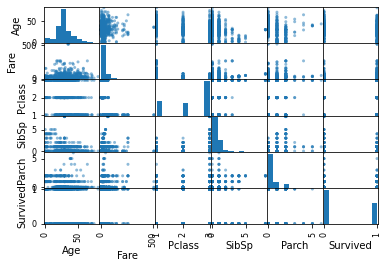

In [13]:
pd.plotting.scatter_matrix(df[fields])

## 11. Постройте гистограммы распределения каждого признака (столбца данных). 

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

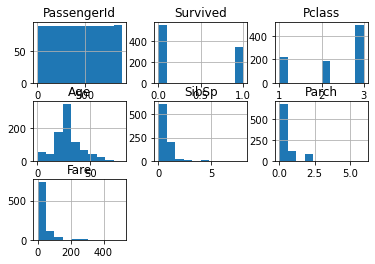

In [14]:
df.hist()

## 12. Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot. 

(0.0, 40.0)

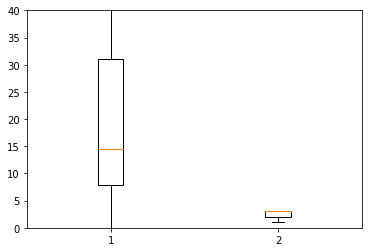

In [15]:
plt.boxplot(df[['Fare', 'Pclass']])
plt.ylim((0, 40))

## 13. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue. 


Колличество погибших мужчин: 468
Колличество выживших мужчин: 109

Колличество погибших женщин: 81
Колличество выживших женщин: 233



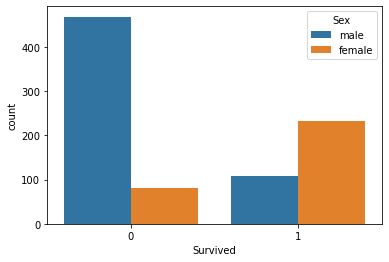

In [32]:
sns.countplot(data=df, x="Survived", hue="Sex")

print(f'''
Колличество погибших мужчин: {df[df['Sex'] == 'male'][df['Survived'] == 0].count()[0]}
Колличество выживших мужчин: {df[df['Sex'] == 'male'][df['Survived'] == 1].count()[0]}

Колличество погибших женщин: {df[df['Sex'] == 'female'][df['Survived'] == 0].count()[0]}
Колличество выживших женщин: {df[df['Sex'] == 'female'][df['Survived'] == 1].count()[0]}
''')

#df[df['Sex'] == 'female'][df['Survived'] == 1].count()

## 14. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue. 


Колличество погибших из класса 1: 80
Колличество выживших из класса 1: 136

Колличество погибших из класса 1: 97
Колличество выживших из класса 1: 87

Колличество погибших из класса 1: 372
Колличество выживших из класса 1: 119



<AxesSubplot:xlabel='Survived', ylabel='count'>

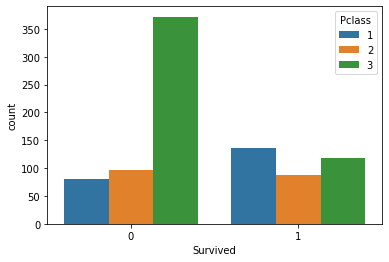

In [33]:
print(f'''
Колличество погибших из класса 1: {df[df['Pclass'] == 1][df['Survived'] == 0].count()[0]}
Колличество выживших из класса 1: {df[df['Pclass'] == 1][df['Survived'] == 1].count()[0]}

Колличество погибших из класса 1: {df[df['Pclass'] == 2][df['Survived'] == 0].count()[0]}
Колличество выживших из класса 1: {df[df['Pclass'] == 2][df['Survived'] == 1].count()[0]}

Колличество погибших из класса 1: {df[df['Pclass'] == 3][df['Survived'] == 0].count()[0]}
Колличество выживших из класса 1: {df[df['Pclass'] == 3][df['Survived'] == 1].count()[0]}
''')
sns.countplot(data=df, x="Survived", hue="Pclass")

## 15. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет. 

Количество выживших молодых 208
Количество выживших старых 5


<BarContainer object of 2 artists>

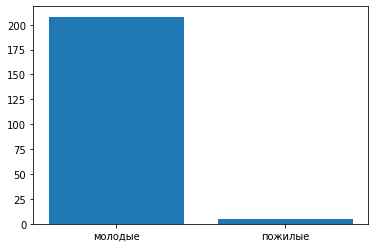

In [18]:
yang_count = df[df['Age'] < 30][df['Survived'] == 1].count()[0]
old_count = df[df['Age'] > 60][df['Survived'] == 1].count()[0]

print('Количество выживших молодых ' + str(yang_count))
print('Количество выживших старых ' + str(old_count))

#plt.ylabel('Количество выживших')
plt.bar(['молодые', 'пожилые'], [yang_count, old_count])


## 16. Постройте график рассеяния на осях Age и Fare. Cиним отметьте пассажиров, которые не выжили (Survived = 0) и красным — выживших (Survived = 1). 

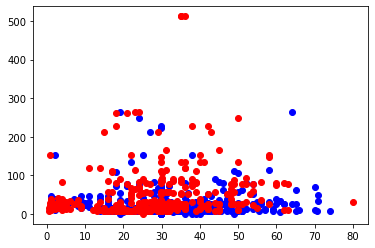

In [19]:
survived_true = df[df['Survived'] == 1]
survived_false = df[df['Survived'] == 0]
plt.scatter(survived_false['Age'], survived_false['Fare'], color='blue')
plt.scatter(survived_true['Age'], survived_true['Fare'], color='red')

# Machine Learning 

## 17. Разбить данные на обучающую и проверочную выборки 

In [20]:
y = pd.DataFrame(df['Survived'], columns=['Survived'])
# y = df['Survived']
X = df.drop('Survived', axis=1)

encoded = OrdinalEncoder()
X = encoded.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 18. Построить графики целевой переменной Survived 

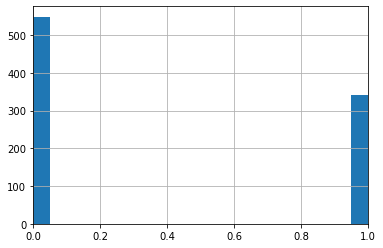

In [21]:
df['Survived'].hist(bins=20)
plt.xlim((0,1))
plt.show()

## 19. Построить корреляционные матрицы переменных (таблица/график) 

In [22]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

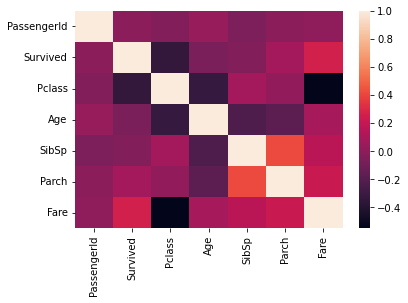

In [23]:
sns.heatmap(df.corr())

In [24]:
f_regression(X,y)

(array([2.22848123e-02, 1.15031272e+02, 2.93290337e+00, 3.72405724e+02,
        3.48292445e+00, 6.19321544e-01, 5.96346384e+00, 2.47408282e+01,
        1.11583030e+02, 2.83148819e+01, 2.57172865e+01]),
 array([8.81365777e-01, 2.53704739e-25, 8.71399843e-02, 1.40606613e-69,
        6.23341504e-02, 4.31509258e-01, 1.47992454e-02, 7.87116754e-07,
        1.18634026e-24, 1.30574478e-07, 4.81109269e-07]))

## 20. Обучить 3 модели классификаторов и выбрать лучшую по точности (целевая переменная - Survived). 21. Предсказать Survived

### Модель 1 - k ближайших соседей

In [25]:
index = 11

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=3)
k_neighbors_classifier = k_neighbors_classifier.fit(X_train, y_train)
y_test_pred = k_neighbors_classifier.predict([X_test[index]])

y_test_value = y_test.iloc[index]['Survived']
print(f'''
KNeighborsClassifier - {y_test_pred}
y_test - {y_test_value}
''')


KNeighborsClassifier - [0]
y_test - 0



#### Матрица ошибок

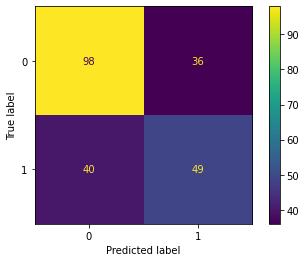

In [26]:
metrics.plot_confusion_matrix(k_neighbors_classifier, X_test, y_test)

### Модель 2 - метод опорных векторов

In [27]:
index = 6

svc_classifer = SVC()
svc_classifer = svc_classifer.fit(X_train, y_train)
y_test_pred = svc_classifer.predict([X_test[index]])

y_test_value = y_test.iloc[index]['Survived']
print(f'''
svc_classifer - {y_test_pred}
y_test - {y_test_value}
''')


svc_classifer - [0]
y_test - 1



#### Матрица ошибок

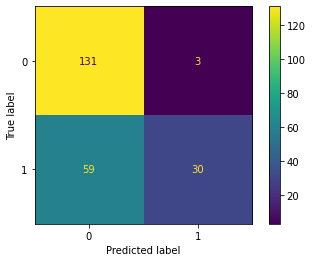

In [28]:
metrics.plot_confusion_matrix(svc_classifer, X_test, y_test)

### Модель 3 - метод опорных векторов

In [29]:
index = 5

decision_tree_classifier = DecisionTreeClassifier(max_depth=2)
decision_tree_classifier = decision_tree_classifier.fit(X_train, y_train)
y_test_pred = decision_tree_classifier.predict([X_test[index]])

y_test_value = y_test.iloc[index]['Survived']
print(f'''
decision_tree_classifier - {y_test_pred}
y_test - {y_test_value}
''')


decision_tree_classifier - [1]
y_test - 1



#### Матрица ошибок

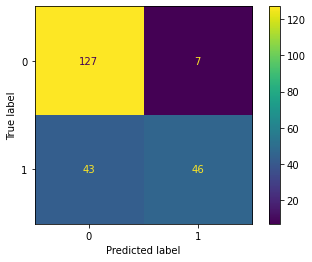

In [30]:
metrics.plot_confusion_matrix(decision_tree_classifier, X_test, y_test)

#### Дерево принятия решений

[Text(167.4, 181.2, 'X[3] <= 0.5\ngini = 0.471\nsamples = 668\nvalue = [415, 253]'),
 Text(83.7, 108.72, 'X[1] <= 1.5\ngini = 0.383\nsamples = 229\nvalue = [59, 170]'),
 Text(41.85, 36.23999999999998, 'gini = 0.064\nsamples = 120\nvalue = [4, 116]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 109\nvalue = [55, 54]'),
 Text(251.10000000000002, 108.72, 'X[4] <= 10.5\ngini = 0.307\nsamples = 439\nvalue = [356, 83]'),
 Text(209.25, 36.23999999999998, 'gini = 0.408\nsamples = 21\nvalue = [6, 15]'),
 Text(292.95, 36.23999999999998, 'gini = 0.272\nsamples = 418\nvalue = [350, 68]')]

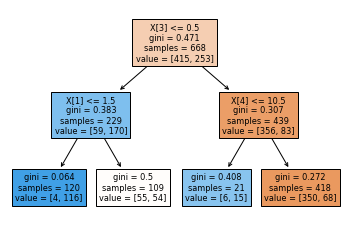

In [31]:
plot_tree(decision_tree_classifier, filled=True)